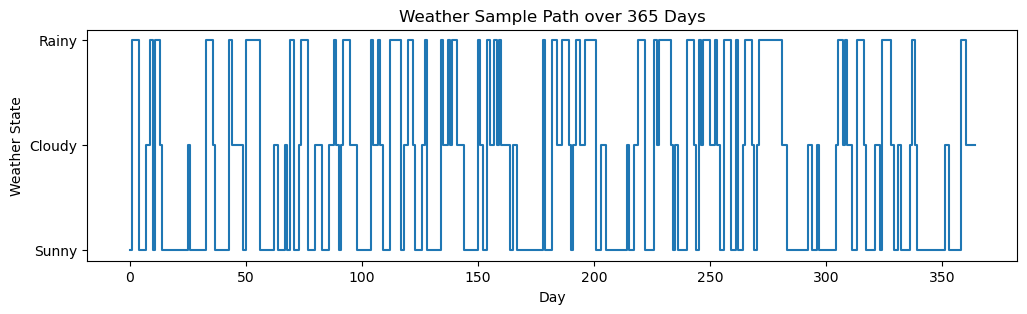

Empirical distribution after 25 days (10k paths, start Sunny):
{'Sunny': 0.4538, 'Cloudy': 0.285, 'Rainy': 0.2612}
Stationary distribution:
{'Sunny': 0.4565217391304348, 'Cloudy': 0.28260869565217384, 'Rainy': 0.26086956521739124}
Convergence time (Sunny start): 140 days

Initial Distribution: Sunny only
Empirical Distribution after 25 days: {'Sunny': 0.4573, 'Cloudy': 0.2844, 'Rainy': 0.2583}
Convergence time: 37 days


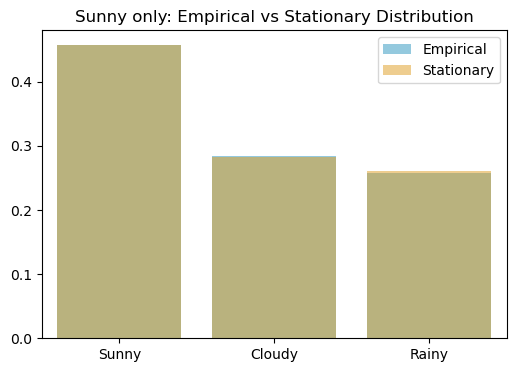


Initial Distribution: Uniform
Empirical Distribution after 25 days: {'Sunny': 0.4447, 'Cloudy': 0.2935, 'Rainy': 0.2618}
Convergence time: 120 days


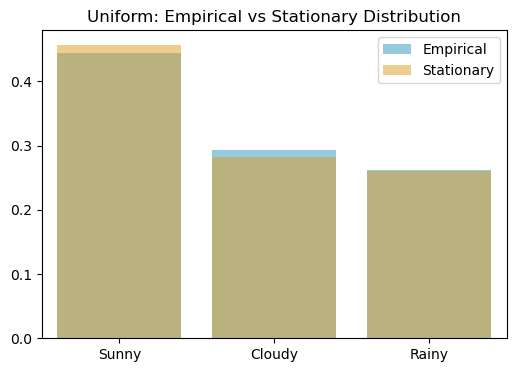


Initial Distribution: Custom
Empirical Distribution after 25 days: {'Sunny': 0.452, 'Cloudy': 0.281, 'Rainy': 0.267}
Convergence time: 30 days


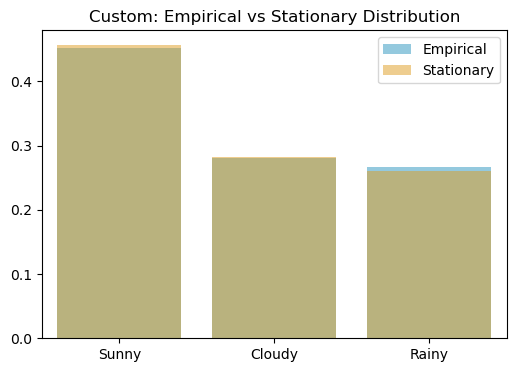

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# States and transition matrix
states = ["Sunny", "Cloudy", "Rainy"]
P = np.array([[0.7, 0.2, 0.1],
              [0.3, 0.4, 0.3],
              [0.2, 0.3, 0.5]])

# 1. Generate a sample path -------------------------------------------------
def generate_sample_path(P, initial_state, n_days):
    path = [initial_state]
    for _ in range(n_days - 1):
        current_state = path[-1]
        next_state = np.random.choice(len(states), p=P[current_state])
        path.append(next_state)
    return path

# Example: start from Sunny (index 0)
np.random.seed(42)
path = generate_sample_path(P, 0, 365)

plt.figure(figsize=(12, 3))
plt.plot(path, drawstyle='steps-pre')
plt.yticks(range(len(states)), states)
plt.title("Weather Sample Path over 365 Days")
plt.xlabel("Day")
plt.ylabel("Weather State")
plt.show()

# 2. Empirical long-term distribution ----------------------------------------
def empirical_distribution(P, initial_state, n_days, n_paths):
    counts = np.zeros(len(states))
    for _ in range(n_paths):
        path = generate_sample_path(P, initial_state, n_days)
        counts[path[-1]] += 1  # count final day
    return counts / n_paths

emp_dist = empirical_distribution(P, 0, 25, 10000)
print("Empirical distribution after 25 days (10k paths, start Sunny):")
print(dict(zip(states, emp_dist)))

# 3. Stationary distribution -------------------------------------------------
def stationary_distribution(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    stat = eigvecs[:, np.isclose(eigvals, 1)]
    stat = stat[:, 0]
    stat = stat / stat.sum()
    return np.real(stat)

pi = stationary_distribution(P)
print("Stationary distribution:")
print(dict(zip(states, pi)))

# 4. Compare empirical vs theoretical ---------------------------------------
def convergence_time(P, initial_state, tol=1e-3, max_days=500):
    for n in range(1, max_days + 1):
        emp = empirical_distribution(P, initial_state, n, 5000)
        if np.allclose(emp, pi, atol=tol):
            return n
    return None

n_converge = convergence_time(P, 0)
print(f"Convergence time (Sunny start): {n_converge} days")

# 5. Repeat with different initial distributions -----------------------------
initial_distributions = {
    "Sunny only": [1, 0, 0],
    "Uniform": [1/3, 1/3, 1/3],
    "Custom": [0.5, 0.25, 0.25]
}

for name, init_dist in initial_distributions.items():
    # Pick random initial state according to distribution
    initial_state = np.random.choice(len(states), p=init_dist)
    emp_dist = empirical_distribution(P, initial_state, 25, 10000)
    n_converge = convergence_time(P, initial_state)
    print(f"\nInitial Distribution: {name}")
    print("Empirical Distribution after 25 days:", dict(zip(states, emp_dist)))
    print(f"Convergence time: {n_converge} days")

    # Visualization
    plt.figure(figsize=(6, 4))
    sns.barplot(x=states, y=emp_dist, color='skyblue', label='Empirical')
    sns.barplot(x=states, y=pi, color='orange', alpha=0.5, label='Stationary')
    plt.title(f"{name}: Empirical vs Stationary Distribution")
    plt.legend()
    plt.show()


Transition matrix P:
[[0.         0.33333333 0.33333333 0.         0.         0.33333333]
 [0.5        0.         0.         0.5        0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.         0.         0.         0.         0.         1.        ]
 [0.         0.         0.         0.         0.         1.        ]
 [0.         0.         1.         0.         0.         0.        ]]

Google matrix G:
[[0.025      0.30833333 0.30833333 0.025      0.025      0.30833333]
 [0.45       0.025      0.025      0.45       0.025      0.025     ]
 [0.025      0.025      0.025      0.025      0.875      0.025     ]
 [0.025      0.025      0.025      0.025      0.025      0.875     ]
 [0.025      0.025      0.025      0.025      0.025      0.875     ]
 [0.025      0.025      0.875      0.025      0.025      0.025     ]]

PageRank via Power Iteration:
[0.04050213 0.0364756  0.29751903 0.04050213 0.27789118 0.30710992]

PageRank via Linear System:
[0.

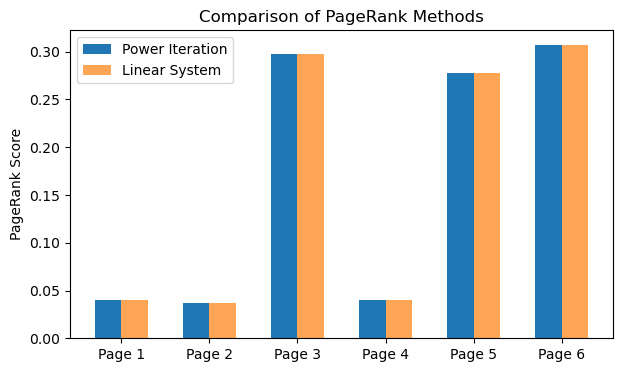

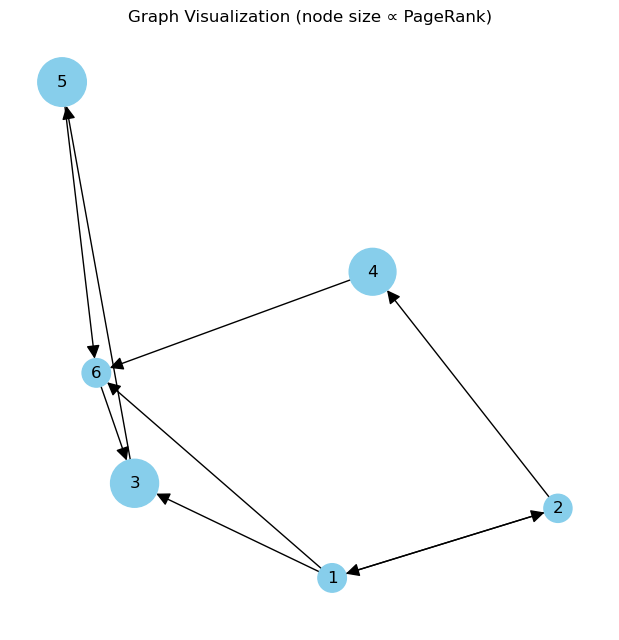

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define graph edges (from figure)
edges = [
    (1,2), (1,3), (1,6),
    (2,1), (2,4),
    (3,5),
    (4,6),
    (5,6),
    (6,3)
]

n = 6
alpha = 0.85

# 1. Construct transition matrix P --------------------------------------
P = np.zeros((n,n))
outdeg = np.zeros(n)
for i,j in edges:
    outdeg[i-1] += 1

for i,j in edges:
    P[i-1, j-1] = 1/outdeg[i-1]

# Handle dangling nodes (none here, but for generality)
for i in range(n):
    if outdeg[i] == 0:
        P[i,:] = 1/n

print("Transition matrix P:")
print(P)

# 2. Google matrix -------------------------------------------------------
J = np.ones((n,n))
G = alpha*P + (1-alpha)/n * J

print("\nGoogle matrix G:")
print(G)

# 3.i Power Iteration ----------------------------------------------------
def pagerank_power_iteration(G, tol=1e-10, max_iter=10000):
    n = G.shape[0]
    pi = np.ones(n)/n
    for k in range(max_iter):
        new_pi = pi @ G
        if np.linalg.norm(new_pi - pi, 1) < tol:
            return new_pi
        pi = new_pi
    return pi

pi_power = pagerank_power_iteration(G)
print("\nPageRank via Power Iteration:")
print(pi_power)

# 3.ii Linear System -----------------------------------------------------
# Solve pi G = pi  -> (G^T - I^T) pi^T = 0
A = (G.T - np.eye(n))
A = np.vstack([A, np.ones(n)])
b = np.zeros(n+1)
b[-1] = 1

pi_linear, *_ = np.linalg.lstsq(A, b, rcond=None)
print("\nPageRank via Linear System:")
print(pi_linear)

# Compare ----------------------------------------------------------------
plt.figure(figsize=(7,4))
x = np.arange(1, n+1)
plt.bar(x-0.15, pi_power, width=0.3, label='Power Iteration')
plt.bar(x+0.15, pi_linear, width=0.3, label='Linear System', alpha=0.7)
plt.xticks(x, [f"Page {i}" for i in range(1,n+1)])
plt.ylabel("PageRank Score")
plt.title("Comparison of PageRank Methods")
plt.legend()
plt.show()

# Visualize graph with PageRank node sizes -------------------------------
G_nx = nx.DiGraph()
G_nx.add_edges_from(edges)
plt.figure(figsize=(6,6))
pos = nx.spring_layout(G_nx, seed=42)
nx.draw(G_nx, pos, with_labels=True, node_size=3000*pi_power+300,
        node_color='skyblue', arrowsize=20, font_size=12)
plt.title("Graph Visualization (node size ∝ PageRank)")
plt.show()

Empirical E[T_1->{4}] from 100000 paths: 14.6814


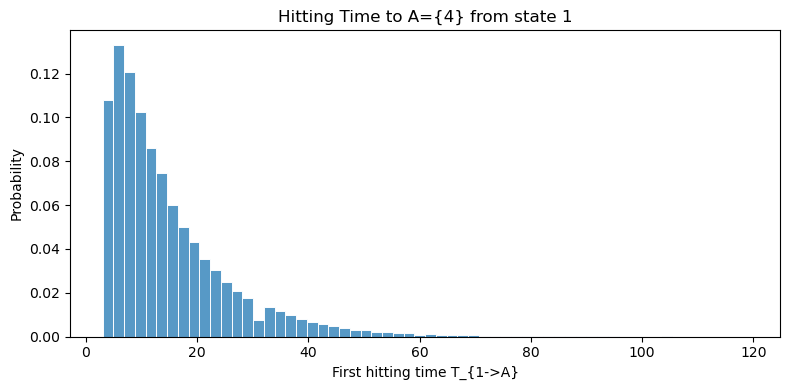

Empirical mean recurrence time to state 2 over 1000000 steps: 2.8245 (from 354047 returns)


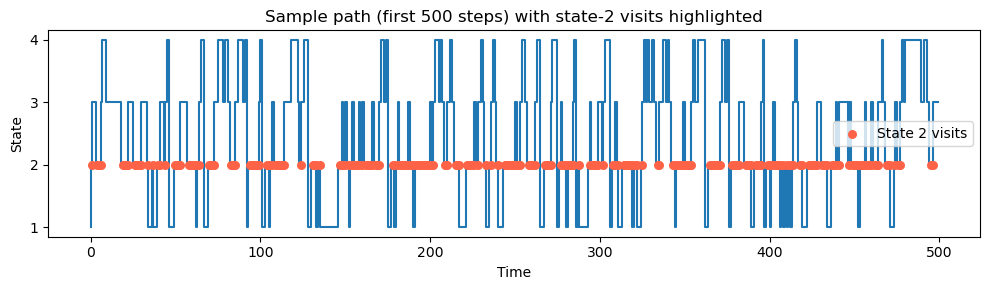

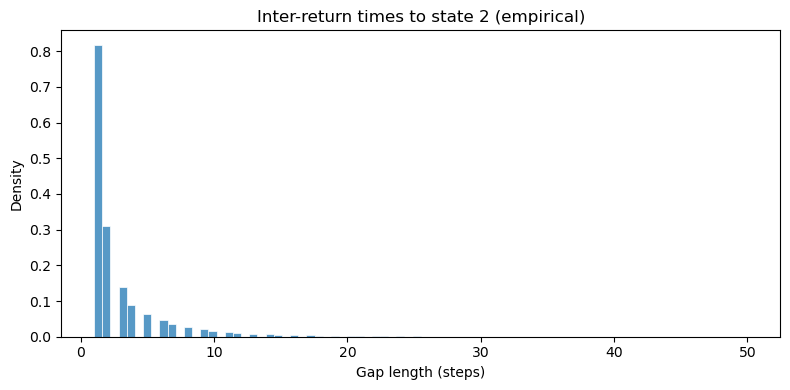


Stationary distribution (π):
  π_1 = 0.176471
  π_2 = 0.352941
  π_3 = 0.294118
  π_4 = 0.176471

Theoretical mean recurrence times m_i = 1/π_i:
  m_1 = 5.6667
  m_2 = 2.8333
  m_3 = 3.4000
  m_4 = 5.6667

Compare for state 2: empirical m2 ≈ 2.8245  vs  theoretical m2 = 2.8333


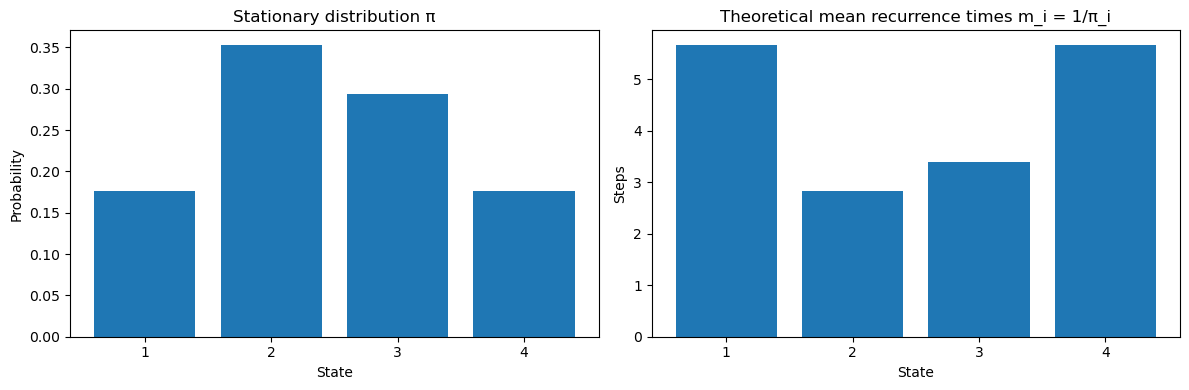

In [4]:
# Markov chain: Hitting times & Mean recurrence times (corrected)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Transition matrix (states 1..4)
P = np.array([
    [0.5, 0.5, 0.0, 0.0],
    [0.2, 0.5, 0.3, 0.0],
    [0.0, 0.3, 0.4, 0.3],
    [0.1, 0.0, 0.4, 0.5],
])
states = np.arange(1, 5)

# RNG (reproducible)
rng = np.random.default_rng(42)

# ---------- Utilities ----------
def step(P, current):
    """Return next state (1-indexed states) sampled from P[current-1]."""
    return int(rng.choice(states, p=P[current-1]))

def hitting_time_to_set(P, start_state=1, target_set={4}, max_steps=10_000_000):
    """Simulate first hitting time T_{start_state -> target_set}."""
    t = 0
    s = start_state
    if s in target_set:
        return 0
    while t < max_steps:
        s = step(P, s)
        t += 1
        if s in target_set:
            return t
    return np.nan  # fallback if not hit within max_steps

def estimate_hitting_time(P, N=100_000, start_state=1, target_set={4}):
    """Return (mean_hitting_time, samples_array)."""
    # WARNING: large N may take a while; reduce for quick tests.
    samples = np.array([hitting_time_to_set(P, start_state, target_set) for _ in range(N)], dtype=float)
    mean_ht = np.nanmean(samples)
    return mean_ht, samples

def long_trajectory(P, start_state=1, T=1_000_000):
    """Generate a single long trajectory of length T (states as ints)."""
    traj = np.empty(T, dtype=int)
    traj[0] = start_state
    for t in range(1, T):
        traj[t] = step(P, traj[t-1])
    return traj

def mean_recurrence_time_empirical(traj, state=2):
    """Compute empirical average inter-return time to `state` from a single trajectory."""
    idx = np.flatnonzero(traj == state)
    if len(idx) < 2:
        return np.nan, np.array([], dtype=int)
    gaps = np.diff(idx)   # differences between successive visit indices
    return gaps.mean(), gaps

def stationary_distribution(P):
    """Compute stationary distribution pi by eigenvector of P^T (eigenvalue 1)."""
    vals, vecs = np.linalg.eig(P.T)
    # find eigenvalue closest to 1
    i = np.argmin(np.abs(vals - 1.0))
    v = np.real(vecs[:, i])
    # make non-negative and normalize
    v = np.maximum(v, 0)
    if v.sum() == 0:
        # fallback: normalize the absolute values
        v = np.abs(np.real(vecs[:, i]))
    pi = v / v.sum()
    return pi

def theoretical_mean_recurrence_times(pi):
    """m_i = 1/pi_i"""
    return 1.0 / pi

# -----------------------------
# 1) Hitting time simulation (A = {4} from start = 1)
N = 100_000   # recommended: 100_000 per assignment, reduce to 10_000 for quick tests
mean_ht, ht_samples = estimate_hitting_time(P, N=N, start_state=1, target_set={4})

valid_count = np.count_nonzero(~np.isnan(ht_samples))
# print using .format to avoid any nested-brace f-string pitfalls
print("Empirical E[T_1->{{4}}] from {} paths: {:.4f}".format(valid_count, mean_ht))

plt.figure(figsize=(8,4))
sns.histplot(ht_samples[~np.isnan(ht_samples)], bins=60, stat='probability', edgecolor='white')
plt.title('Hitting Time to A={4} from state 1')
plt.xlabel('First hitting time T_{1->A}')
plt.ylabel('Probability')
plt.tight_layout()
plt.show()

# -----------------------------
# 2) Empirical mean recurrence time for state 2 (single long trajectory)
T = 1_000_000   # recommended per assignment; reduce to 200_000 for faster runs
traj = long_trajectory(P, start_state=1, T=T)
mr_emp, return_gaps = mean_recurrence_time_empirical(traj, state=2)

print(f"Empirical mean recurrence time to state 2 over {T} steps: {mr_emp:.4f} (from {len(return_gaps)} returns)")

# Visualize first 500 steps and highlight visits to state 2
plt.figure(figsize=(10,3))
plt.plot(traj[:500], drawstyle='steps-pre')
plt.yticks(states)
vis_idx = np.flatnonzero(traj[:500] == 2)
plt.scatter(vis_idx, traj[:500][vis_idx], color='tomato', s=30, label='State 2 visits', zorder=3)
plt.title('Sample path (first 500 steps) with state-2 visits highlighted')
plt.xlabel('Time')
plt.ylabel('State')
plt.legend()
plt.tight_layout()
plt.show()

# Distribution of inter-return times to state 2
if len(return_gaps) > 0:
    plt.figure(figsize=(8,4))
    sns.histplot(return_gaps, bins=80, stat='density', edgecolor='white')
    plt.title('Inter-return times to state 2 (empirical)')
    plt.xlabel('Gap length (steps)')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough visits to state 2 in trajectory to compute inter-return distribution.")

# -----------------------------
# 3) Stationary distribution & theoretical mean recurrence times
pi = stationary_distribution(P)
mr_theory = theoretical_mean_recurrence_times(pi)

print("\nStationary distribution (π):")
for i, p in enumerate(pi, start=1):
    print(f"  π_{i} = {p:.6f}")

print("\nTheoretical mean recurrence times m_i = 1/π_i:")
for i, m in enumerate(mr_theory, start=1):
    print(f"  m_{i} = {m:.4f}")

print(f"\nCompare for state 2: empirical m2 ≈ {mr_emp:.4f}  vs  theoretical m2 = {mr_theory[1]:.4f}")

# Visual bars for π and m_i
fig, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].bar(states, pi)
axes[0].set_title('Stationary distribution π')
axes[0].set_xticks(states)
axes[0].set_xlabel('State')
axes[0].set_ylabel('Probability')

axes[1].bar(states, mr_theory)
axes[1].set_title('Theoretical mean recurrence times m_i = 1/π_i')
axes[1].set_xticks(states)
axes[1].set_xlabel('State')
axes[1].set_ylabel('Steps')

plt.tight_layout()
plt.show()


Strongly connected components (communicating classes): [(4, 5, 6), (3,), (1, 2)]

Empirical reachability matrix R (rows i -> columns j):
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [0 0 1 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]]


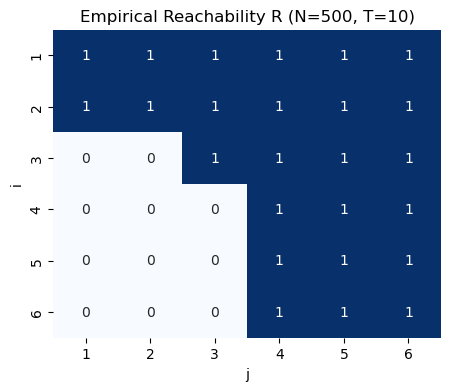


Empirical return frequencies f_i(T) with N=500 runs, T=100:
 State 1: f_1 = 0.072 -> transient (returned in 36 of 500 runs)
 State 2: f_2 = 0.098 -> transient (returned in 49 of 500 runs)
 State 3: f_3 = 0.000 -> transient (returned in 0 of 500 runs)
 State 4: f_4 = 1.000 -> recurrent (returned in 500 of 500 runs)
 State 5: f_5 = 1.000 -> recurrent (returned in 500 of 500 runs)
 State 6: f_6 = 1.000 -> recurrent (returned in 500 of 500 runs)


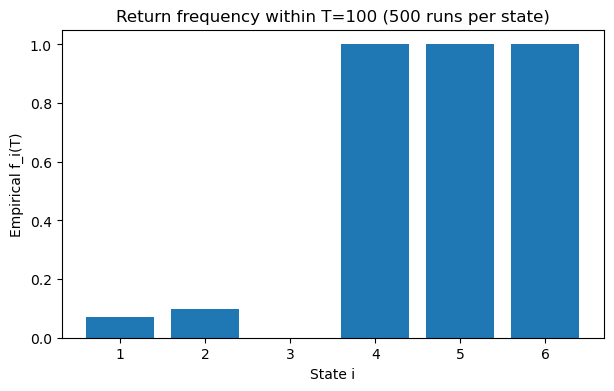


Communicating classes (SCC) and empirical recurrence labels:
 Class (4, 5, 6): labels = ['recurrent', 'recurrent', 'recurrent'] -> all same? True
 Class (3,): labels = ['transient'] -> all same? True
 Class (1, 2): labels = ['transient', 'transient'] -> all same? True


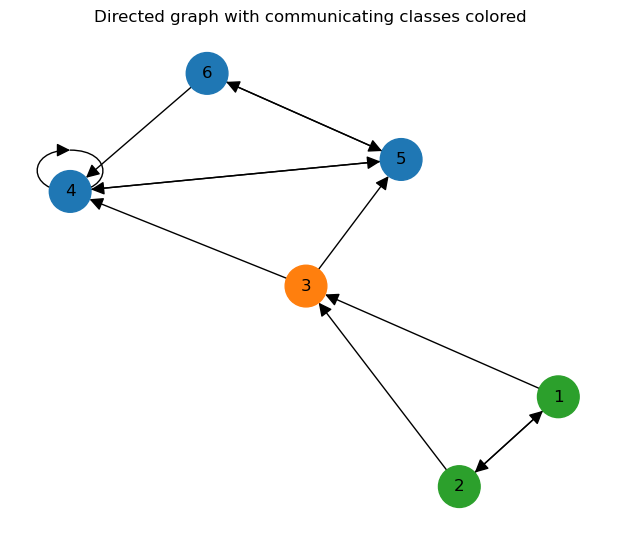


Summary:
- Strongly connected components (communicating classes): [(4, 5, 6), (3,), (1, 2)]
- Empirical reachability matrix R printed above (1 means observed path in some trajectory).
- Empirical recurrence labels per state: {1: 'transient', 2: 'transient', 3: 'transient', 4: 'recurrent', 5: 'recurrent', 6: 'recurrent'}


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from collections import defaultdict

# -----------------------------
# Problem 4: Communicating Classes and Class Properties
# State space: {1,2,3,4,5,6}
P = np.array([
    [0.0, 0.5, 0.5, 0.0, 0.0, 0.0],
    [0.2, 0.0, 0.8, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.5, 0.5, 0.0],
    [0.0, 0.0, 0.0, 0.4, 0.6, 0.0],
    [0.0, 0.0, 0.0, 0.5, 0.0, 0.5],
    [0.0, 0.0, 0.0, 0.3, 0.7, 0.0]
])

n = P.shape[0]
states = np.arange(1, n+1)

rng = np.random.default_rng(123)

# Build directed graph from P (edge i->j if P[i,j] > 0)
G_nx = nx.DiGraph()
for i in range(n):
    for j in range(n):
        if P[i,j] > 0:
            G_nx.add_edge(i+1, j+1)

# Analytical communicating classes via strongly connected components
scc = list(nx.strongly_connected_components(G_nx))
scc_sorted = [tuple(sorted(list(c))) for c in scc]
print("Strongly connected components (communicating classes):", scc_sorted)

# -----------------------------
# 1) Empirical reachability matrix R using N trajectories of length T
#    R_ij = 1 if there exists at least one trajectory in which there is a path from i to j

def simulate_trajectory(P, T, start_state=None):
    if start_state is None:
        s = int(rng.choice(states))
    else:
        s = int(start_state)
    traj = np.empty(T+1, dtype=int)
    traj[0] = s
    for t in range(1, T+1):
        probs = P[traj[t-1]-1]
        # if a row had all zeros (dangling), jump uniformly (not present here)
        if probs.sum() == 0:
            probs = np.ones(n)/n
        traj[t] = int(rng.choice(states, p=probs))
    return traj


def empirical_reachability(P, N=500, T=10):
    n = P.shape[0]
    R = np.zeros((n,n), dtype=int)
    for r in range(N):
        traj = simulate_trajectory(P, T)
        # For each pair (i,j), check if there is a time t with X_t = i and later t' >= t with X_t' = j
        # We do this efficiently by recording first occurrence times for each state and later occurrences
        positions = defaultdict(list)
        for t, s in enumerate(traj):
            positions[int(s)].append(t)
        for i in range(1, n+1):
            if len(positions[i]) == 0:
                continue
            first_times = positions[i]
            # If any j appears at a time >= some i occurrence, mark R[i-1,j-1]=1
            for j in range(1, n+1):
                # check if j appears after any occurrence of i
                found = False
                for t0 in first_times:
                    # binary search or simple check
                    # since T small, do simple check
                    if any(t1 >= t0 for t1 in positions.get(j, [])):
                        R[i-1, j-1] = 1
                        break
    return R

N = 500
T = 10
R_emp = empirical_reachability(P, N=N, T=T)

print("\nEmpirical reachability matrix R (rows i -> columns j):")
print(R_emp)

plt.figure(figsize=(5,4))
sns.heatmap(R_emp, annot=True, cmap='Blues', cbar=False, xticklabels=states, yticklabels=states)
plt.title(f'Empirical Reachability R (N={N}, T={T})')
plt.xlabel('j')
plt.ylabel('i')
plt.show()

# -----------------------------
# 2) Empirical classification: transient vs recurrent
# For each state i, set X0 = i and run N runs up to T_long. Record whether return occurs within T_long.

N2 = 500
T_long = 100
return_freq = np.zeros(n)
return_counts = np.zeros(n, dtype=int)
valid_runs = np.zeros(n, dtype=int)

for i in range(1, n+1):
    deltas = np.zeros(N2, dtype=int)
    for r in range(N2):
        traj = simulate_trajectory(P, T_long, start_state=i)
        # find first return time (n >=1) where X_n == i
        # we check indices 1..T_long
        returns = np.flatnonzero(traj[1:] == i)
        if returns.size > 0:
            # returns gives indices starting at 0 corresponding to time 1..T_long
            deltas[r] = 1
    return_counts[i-1] = deltas.sum()
    return_freq[i-1] = deltas.mean()

print("\nEmpirical return frequencies f_i(T) with N=500 runs, T=100:")
for i in range(1, n+1):
    label = 'recurrent' if return_freq[i-1] >= 1.0 - 1e-12 else 'transient' if return_freq[i-1] < 1.0 else 'recurrent'
    print(f" State {i}: f_{i} = {return_freq[i-1]:.3f} -> {label} (returned in {return_counts[i-1]} of {N2} runs)")

# Plot the empirical return frequencies
plt.figure(figsize=(7,4))
plt.bar(states, return_freq)
plt.ylim(0,1.05)
plt.xticks(states)
plt.xlabel('State i')
plt.ylabel('Empirical f_i(T)')
plt.title(f'Return frequency within T={T_long} ({N2} runs per state)')
plt.show()

# -----------------------------
# 3) Verification of class properties
# Use analytical SCC result as classes and check that within each class, empirical labels are same

# derive empirical labels
emp_labels = ['recurrent' if return_freq[i-1] >= 1.0 - 1e-12 else 'transient' for i in range(1, n+1)]

print('\nCommunicating classes (SCC) and empirical recurrence labels:')
for comp in scc_sorted:
    labels_in_comp = [emp_labels[i-1] for i in comp]
    same = all(l == labels_in_comp[0] for l in labels_in_comp)
    print(f" Class {comp}: labels = {labels_in_comp} -> all same? {same}")

# Visualize graph with classes colored
color_map = {}
palette = sns.color_palette('tab10', len(scc_sorted))
for idx, comp in enumerate(scc_sorted):
    for v in comp:
        color_map[v] = palette[idx]

node_colors = [color_map.get(i, (0.8,0.8,0.8)) for i in range(1, n+1)]
plt.figure(figsize=(6,5))
pos = nx.spring_layout(G_nx, seed=42)
nx.draw(G_nx, pos, with_labels=True, node_color=node_colors, node_size=900, arrowsize=20)
plt.title('Directed graph with communicating classes colored')
plt.show()

# Summary print
print('\nSummary:')
print('- Strongly connected components (communicating classes):', scc_sorted)
print('- Empirical reachability matrix R printed above (1 means observed path in some trajectory).')
print('- Empirical recurrence labels per state:', dict(zip(states, emp_labels)))

# Note: Because empirical checks are statistical, results can change slightly between runs.
# Increasing N and T reduces variance. 
